In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive



(https://github.com/frm-garp/Logistic-Regression-in-Python--Predict-the-Probability-of-Default-of-an-Individual)

[link text]
(https://medium.com/@polanitzer/logistic-regression-in-python-predict-the-probability-of-default-of-an-individual-8a0091da3775)

In [18]:
data=pd.read_excel("/content/gdrive/MyDrive/Bank credit risk LG/Bank Default.xlsx")

In [ ]:
data.info()
data.describe()

### We dont have any missing values

In [ ]:
data.isnull().sum()

In [ ]:
data.isnull().sum()
data.shape
data.columns

In [ ]:
data.shape  # We have 10 variables

Input variables


1.   loan_applicant_id (numeric)
2.   age (numeric)
3.    education : level of education (categorical)
4.     years_with_current_employer (numeric)
5.     years_at_current_address (numeric)
6.     household_income: in thousands of USD (numeric)
7.     debt_to_income_ratio: in percent (numeric)
8.     credit_card_debt: in thousands of USD (numeric)
9.      other_debt: in thousands of USD (numeric)

# Desrtiptive statistics for categorical variables

In [ ]:
sns.countplot(x="y",data=data,palette="Blues")

In [ ]:
sns.countplot(x="education",data=data)

## How can we plot the two categorical variable together with subplots

In [ ]:
fig, axis=plt.subplots(2,1,figsize=(12,7))
a=data["education"]
b=data["y"]
x=sns.countplot(a,color="blue",ax=axis[0])
x=sns.countplot(b,data=data,palette="Blues",ax=axis[1])

### The code below give us the same outputs but with more elegant way

In [ ]:
fig, axis=plt.subplots(1,2,figsize=(12,8))
b=["y","education"]
for index, value in enumerate(b):
  sns.countplot(data[value],data=data,ax=axis[index])

#Descriptive statistics continues variables

In [ ]:
# numerical variables
# δεν χρειαζόμαστε το loan applicant_id γτ είναι η ταυτότητα του δανειολήπτη
data["age"]
data["years_with_current_employer"]
data["years_at_current_address"]
data["household_income"]
data["debt_to_income_ratio"]
data["credit_card_debt"]
data["other_debt"]

## One way to extract all the histograms is to plot individual histogram of each variable as we show below

In [ ]:

a=data["age"].values
mean=data["age"].mean()

sns.distplot(a,color="blue")
plt.axvline(mean,0,1,color="red")

In [ ]:
b=data["years_with_current_employer"].values
sns.distplot(b,color="green")

### A more elegant way to take all the histograms of continues variables.

In [ ]:
fig, axis=plt.subplots(1,7,figsize=(15,10))
a=['age','years_with_current_employer','years_at_current_address','household_income','debt_to_income_ratio','credit_card_debt','other_debt']
for index, value in enumerate(a):
  print(index, value)
  sns.distplot(data[value],ax=axis[index])

In [ ]:
# Δημιούργησα μία λίστα που έχει όλες τις μεταβλητές του dataframe
sub=data[['age','years_with_current_employer','years_at_current_address','household_income','debt_to_income_ratio','credit_card_debt','other_debt']]
for i, col in enumerate(sub.columns):
  plt.figure(i)
  x=sns.distplot(sub[col])
  a.append(x)
a

# We proceed with the  Clustered bar charts 

In [ ]:
data.columns

In [ ]:
# categorical
sns.countplot(x="education",data=data,hue="y")


In [ ]:
sns.set(style='dark',)
res = sns.kdeplot(data['age'],data['y'],shade=True,cmap="Purples_d")
res = sns.kdeplot(data['household_income'],data['y'],shade=True,cmap="Blues")
plt.show()


In [ ]:
fig, axis=plt.subplots(1,7,figsize=(25,8))
a=['age','years_with_current_employer','years_at_current_address','household_income','debt_to_income_ratio','credit_card_debt','other_debt']
for index, value in enumerate(a):
  sns.kdeplot(data[value],hue=data["y"],shade=True,ax=axis[index])

In [ ]:
count_no_default = len(data[data["y"]==0])
count_default = len(data[data["y"]==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default", pct_of_default*100)

 percentage of no default is 88.73458288821988
 percentage of default 11.265417111780131


# Correlation and heatmaps 

In [ ]:
df=pd.DataFrame(data[['age','years_with_current_employer','years_at_current_address','household_income','debt_to_income_ratio','credit_card_debt','other_debt']])

correlation=df.corr()
fig, axis=plt.subplots(1,figsize=(12,7))
# hm=sns.heatmap(pc,annot=True,annot_kws={"size":50},
#              xticklabels=pc,
#              cmap="Greens")  # o heatmap παιρνει σαν δεδομένο τον πίνακα συσχετίσεων.

sns.heatmap(correlation,annot=True,annot_kws={"size":10},
               cmap="Greens")

In [ ]:
x=sns.pairplot(data)

# Joinplots

In [ ]:
sns.jointplot(data=data,x="age",y="household_income",hue="y",kind='hist')

# F test to recognise which variable is correlated to y. Mainly to measure the statistic importance of variables

### Before we proceed we have to recode all the variables. All the variables have to have arithmetic values.

First way to recode avariable is by get dummies. But this way is kindly unpleasant because we are going to use F statistic and we have to have the initial variable and not it's categories.

In [ ]:
cat_vars=["education"]
for var in cat_vars:
 cat_list="var"+"_"+var
 cat_list = pd.get_dummies(data[var], prefix=var)
 data1=data.join(cat_list)
 data=data1
cat_vars=["education"]
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=data[to_keep]
data_final.drop(["loan_applicant_id"], axis=1, inplace=True)  # πετάει την μεταβλητή loan applicant id
data_final.columns.values

## We are going to use the np.where or replace funtion to decide the education

In [ ]:
data["education"].nunique
#sns.countplot(data["education"],data=data)

In [ ]:
# replacing values
data["education"].replace(["illiterate","basic","high.school","professional.course","university.degree"],
                        [0,1,2,3,4], inplace=True)

In [ ]:
data

In [ ]:
data.drop(["loan_applicant_id"],axis=1,inplace=True)


In [ ]:
data

In [ ]:
from sklearn.model_selection import train_test_split
Χ=data.iloc[:,:-1]
y=data["y"]
# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(Χ, y, stratify=y, random_state=0)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

features_responses=data.columns.tolist()

[f_stat, f_p_value]=f_classif(Χ,y)

f_test_df = pd.DataFrame({'Feature':features_responses[:-1],'F statistic':f_stat,"p_value":f_p_value})
f_test_df

f_test_df.sort_values('p_value',ascending=False)


So the most important values are the education, age and the debt to income ratio

In [ ]:
sns.barplot(x="Feature",y="p_value",data=f_test_df)

In [ ]:
import matplotlib.pyplot as plt

X_indices = np.arange(data_final.shape[-1])
X_indices
plt.figure(1)
plt.clf()
plt.bar(x="Feature",height="p_value",data=f_test_df,width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

###In general is good to groypby the response variable and after apply some function such as mean or sum or median, so you can see some insights, to see some details 

In [ ]:
data.groupby("y").mean()

In [ ]:
data.groupby("education").mean()

In [ ]:
data["age"].loc[data["y"]==0].describe()

In [ ]:
data["age"].loc[data["y"]==1].describe()

In [ ]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Stacked Bar Chart of Education vs Default")
plt.xlabel("Education")
plt.ylabel("Proportion of Applicants")
plt.savefig("education_vs_def_stack")

# Data preparetion

In [ ]:
new=data.loc[:,data.columns!="loan_applicant_id"]
data

In [25]:
cat_vars=["education"]
for var in cat_vars:
 cat_list="var"+"_"+var
 cat_list = pd.get_dummies(data[var], prefix=var)
 data1=data.join(cat_list)
 data=data1
cat_vars=["education"]
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=data[to_keep]
#data_final.drop(["loan_applicant_id"], axis=1, inplace=True)  # πετάει την μεταβλητή loan applicant id
data_final.columns.values

In [ ]:
data_final.columns

#Four ways to do feature selection
1. F-statistic
2. PCA
3. Clasifier Trees
4. RFE

> Indented block


[link text] (https://scikit-learn.org/stable/modules/feature_selection.html)

#PCA

 1. Πρώτα χωρίζουμε τις ανεξάρτητες απο τις εξαρτημένες μεταβλητές μας. 
 2. Κατοπίν κάνουμε scale τις ανεξάρτητες.
 3. Εφαρμοζουμε PCA 
 4. Εφαρμόζουμε Scree plot, Threshold, Eigenvalues για να πάρουμε τις καλύτερες    συνιστώσες

In [30]:
#data_final
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
data_final.shape

In [31]:
std_slc = StandardScaler()
X=data_final.loc[:,data_final.columns != "y"]
X.shape
X_scaled = std_slc.fit_transform(X)

The n_components argument will define the number of components that we want to reduce the features to.
With the code above, you can see that applying PCA didn’t impact the number of rows, but did impact the number of columns

In [32]:
from sklearn import decomposition, datasets
#pca = decomposition.PCA(n_components=4)
pca = decomposition.PCA()
pca_features=pca.fit_transform(X_scaled)

In [ ]:
pca_features

In [ ]:
#pca_df = pd.DataFrame(data=pca_features)

pca_df = pd.DataFrame(
     data=pca_features, 
     columns=['PC1', 'PC2', 'PC3',"PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])

pca_df

Ποιες απο αυτές τις συνιστώσες ειναι σημαντικές και ποιες όχι

In [ ]:
pca = PCA().fit(X_scaled)


import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()

xi = np.arange(1, 13, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Χρειαζόμαστε 10 κύριες συνιστώσες

In [ ]:
pca.explained_variance_

In [ ]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=11)
 
# Fit and transform data
pca.fit_transform(X_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=12)
 
# Fit and transform data
reduced_features = pca.fit_transform(X_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

## Εφόσον έχουμε κάνει PCA κατόπιν μπορούμε να κάνουμε Regression το λεγόμενο PCR.

Unfortunately, this remarkable power of dimensionality reduction comes at the cost of not being able to understand what these components represent easily.
Components are maintained as an attribute of the fitted PCA object and correspond to combinations of the original features:

In [39]:
reduced_features=pd.DataFrame(data=reduced_features,
                              columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])
#pca_df = pd.DataFrame(
#   data=pca_features, 
#   columns=['PC1', 'PC2', 'PC3',"PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])

reduced_features.drop("PC12",axis=1,inplace=True)


In [40]:
#train test split 
data_final["y"]
reduced_features

final=pd.concat([reduced_features,data_final["y"]],axis=1)

X=final.loc[:,final.columns != "y"]
y=data_final["y"]

In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [42]:
RF=LogisticRegression()
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
y_pred_prob = RF.predict_proba(X_test)

In [ ]:
from sklearn import metrics
#ta predicting propabilities
y_pred_prob
y_pred_prob[:,1]
metrics.confusion_matrix(y_test,y_pred)


In [ ]:
pos_proba = y_pred_prob[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

metrics.roc_auc_score(y_test, pos_proba)


#F-test feature selection

The scikit-learn machine library provides an implementation of the ANOVA f-test in the f_classif() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

In [102]:
std_slc = StandardScaler()
X=data_final.loc[:,data_final.columns != "y"]
y=data_final["y"]
X.shape
X_scaled = std_slc.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

features_responses=data_final.columns.tolist()

[f_stat, f_p_value]=f_classif(X,y)

f_test_df = pd.DataFrame({'Feature':features_responses[:-1],'F statistic':f_stat,"p_value":f_p_value})
f_test_df

f_test_df.sort_values('p_value',ascending=True)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.feature_selection import SelectKBest, f_classif

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [ ]:
fs.pvalues_
fs.scores_
fs.feature_names_in_

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
new=pd.DataFrame({"Feature":features_responses[:-1],'F_score':fs.scores_})
new.sort_values(by="F_score",ascending=False)

# εχουμε βρει τις εξι μεταβλητές που θέλουμε

In [ ]:
final=data_final.loc[:,["household_income","credit_card_debt","other_debt","years_with_current_employer","years_at_current_address","debt_to_income_ratio","y"]]
final

In [85]:
X=final
y=final["y"]

X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2)


In [86]:
logreg=LogisticRegression()

logreg.fit(X_train,Y_train)

LogisticRegression()

In [87]:
y_pred=logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)

In [88]:
from sklearn import metrics
#ta predicting propabilities
y_pred_prob
y_pred_prob[:,1]
metrics.confusion_matrix(y_test,y_pred)  

array([[7334,    0],
       [ 904,    0]])

In [ ]:
pos_proba = y_pred_prob[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

metrics.roc_auc_score(y_test, pos_proba)

#Extra Trees Clasiffier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 3)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [ ]:
feature_importance
feature_importance_normalized

lista=X.columns


In [ ]:
lista_1=pd.DataFrame(feature_importance_normalized)
lista_2=pd.DataFrame(lista)
new=pd.concat([lista_2,lista_1],axis=1)

new.columns=["Features","Score"]
new
new.sort_values(by="Score",ascending=False)

# Plotting a Bar Graph to compare the models

plt_1 = plt.figure(figsize=(20, 25))
#fig, plt_1=plt.figure(figsize=(20,25))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

# Over-sampling using SMOTE
With our training data created, I’ll up-sample the default using the SMOTE algorithm (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (default) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

# from imblearn.over_sampling import SMOTE

###upsample the minority class
df_1_upsampled = resample(df_1,random_state=42,n_samples=2,replace=True)

In short, the process to generate the synthetic samples are as follows.



1.   Choose random data from the minority class.
2.   Calculate the Euclidean distance between the random data and its k nearest   neighbors.
3.    Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
4.  Repeat the procedure until the desired proportion of minority class is met.

In [91]:
X = data_final.loc[:, data_final.columns != "y"]
y = data_final.loc[:, data_final.columns == "y"]

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

columns = X_train.columns
#os.fit_resample καταλαβαίνει αυτόματα ότι το y είναι ο στόχος και που πρέπει να κάνει resample
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=["y"])


In [ ]:
os
os_data_X
os_data_y

In [93]:
# we can Check the numbers of our data
print("\033[1m length of oversampled data is",len(os_data_X))
print("\033[1m Number of no default in oversampled data",len(os_data_y[os_data_y["y"]==0]))
print("\033[1m Number of default",len(os_data_y[os_data_y["y"]==1]))
print("\033[1m Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y["y"]==0])/len(os_data_X))
print("\033[1m Proportion of default data in oversampled data is",len(os_data_y[os_data_y["y"]==1])/len(os_data_X))

 length of oversampled data is 48912
 Number of no default in oversampled data 24456
 Number of default 24456
 Proportion of no default data in oversampled data is  0.5
 Proportion of default data in oversampled data is 0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.




In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_final_vars=data_final.columns.values.tolist()
y=["y"]
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
#rfe = RFE(LogisticRegression(),9)
rfe = RFE(LogisticRegression())
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True  True False False False False False]
[1 2 1 1 1 1 1 6 5 7 4 3]


In [95]:
os_data_X.columns

Index(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')

In [ ]:
data_X1 = pd.DataFrame({
 "Feature": os_data_X.columns,
 "Importance": rfe.ranking_},)
data_X1.sort_values(by=["Importance"])

The RFE has helped us select the following features: “years_with_current_employer”, “household_income”, “debt_to_income_ratio”, “other_debt”, “education_basic”, “education_high.school”, “education_illiterate”, “education_professional.course”, “education_university.degree”.

In [97]:
import numpy as np
cols=[]
for i in range (0, len(data_X1["Importance"])):
 if data_X1["Importance"][i] == 1:
  cols.append(data_X1["Feature"][i])
print(cols)
print(len(cols))

['age', 'years_at_current_address', 'household_income', 'debt_to_income_ratio', 'credit_card_debt', 'other_debt']
6


#4. Modeling

In [ ]:
X=os_data_X[cols]
y=os_data_y["y"]



In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
pvalue = pd.DataFrame(result.pvalues,columns={"p_value"},)
pvalue

In [ ]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
 if pvalue["p_value"][i] < 0.05:
  pvs.append(pvalue.index[i])
if "const" in pvs:
 pvs.remove("const")
else:
 pvs 
print(pvs)
print(len(pvs))

['loan_applicant_id', 'age', 'household_income', 'debt_to_income_ratio', 'credit_card_debt', 'other_debt']
6


In [ ]:
X=os_data_X[pvs]
y=os_data_y["y"]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

### Εχουμε διαλέξει το καλυτερο μοντέλο κρατώντας τις καλυτερες μεταβλητές

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.55


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[2932 5097]
 [2119 5993]]


In [ ]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  8925 correct predictions
 The result is telling us that we have:  7216 incorrect predictions
 We have a total predictions of:  16141


Compute precision, recall, F-measure and support
To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.37      0.45      8029
           1       0.54      0.74      0.62      8112

    accuracy                           0.55     16141
   macro avg       0.56      0.55      0.54     16141
weighted avg       0.56      0.55      0.54     16141



Interpretations:

The precision of class 1 in the test set, that is the positive predicted value of our model, tells us out of all the “bad” loan applicants which our model has identified how many were actually “bad” loan applicants. So, 98% of the “bad” loan applicants which our model managed to identify were actually “bad” loan applicants.
The recall of class 1 in the test set, that is the sensitivity of our model, tells us how many “bad” loan applicants our model has managed to identify out of all the “bad” loan applicants existing in our test set. So, our model managed to identify 83% “bad” loan applicants out of all the “bad” loan applicants existing in the test set.

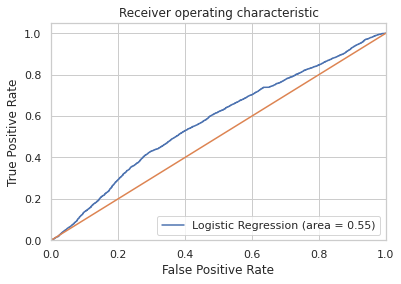

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")

# Τωρα μας ενδιαφερει το id για να συσχετίσουμε το Id me tin πιαθνοτητα μη εκπληρωσεις.

In [ ]:
data["PD"] = logreg.predict_proba(data[X_train.columns])[:,1]
#data[["PD"]].head(10)
data[["loan_applicant_id", "PD"]].head(10)
data[["loan_applicant_id", "PD"]].sort_values(by="PD",ascending=False)

In [ ]:
X_train.columns

In [ ]:
new_data = np.array([3,57,14.26,2.993,0,1,0,0,0]).reshape(1, -1)

new_pred=logreg.predict_proba(new_data)[:,1][0]

print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting on a new debt")